# Convergence

Training convergence figures.

In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sys_simulator.general import load_with_pickle, sns_confidence_interval_plot
from copy import deepcopy
import os

In [2]:
EXP_NAME = 'evaluate1'

# ddpg
ALGO_NAME = 'ddpg'
filepath = "/home/lucas/dev/sys-simulator-2/data/ddpg/evaluate1/20210517-074007/log.pickle"
# dql
# ALGO_NAME = 'dql'
# filepath = "/home/lucas/dev/sys-simulator-2/data/dql/evaluate1/20210516-213236/log.pickle"
# a2c
# ALGO_NAME = 'a2c'
# filepath = "D:\\Dev\\sys-simulator-2\\data\\a2c\\script16\\20210509-134816\\log.pickle"
# output path
OUTPUT_PATH = f'/home/lucas/dev/sys-simulator-2/figs/{EXP_NAME}/{ALGO_NAME}'

file = open(filepath, 'rb')
data = pickle.load(file)
file.close()

In [3]:
data.keys()

dict_keys(['mue_availability', 'mue_sinrs', 'd2d_sinrs', 'd2d_tx_powers', 'trajectories', 'mue_tx_powers'])

In [4]:
mue_availability = np.array(data['mue_availability'])
mue_availability.shape

(700,)

In [5]:
mue_sinrs = np.array(data['mue_sinrs'])
mue_sinrs.shape

(700,)

In [6]:
d2d_sinrs = np.array(data['d2d_sinrs'])
d2d_sinrs.shape

(700, 2)

In [7]:
d2d_tx_powers = np.array(data['d2d_tx_powers'])
d2d_tx_powers.shape

<ipython-input-7-e8f73cd0429b>:1: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  d2d_tx_powers = np.array(data['d2d_tx_powers'])
<ipython-input-7-e8f73cd0429b>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  d2d_tx_powers = np.array(data['d2d_tx_powers'])


(700,)

In [8]:
mue_tx_powers = np.array(data['mue_tx_powers'])
mue_tx_powers.shape

(700,)

## Fonts config

In [9]:
x_font = {
    'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 16,
}
y_font = {
    'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 16,
}
ticks_font = {
    'fontfamily': 'serif',
    'fontsize': 13
}
legends_font = {
    'size': 13,
    'family': 'serif'
}


## Ticks

In [10]:
x = list(range(mue_sinrs.shape[0]))

## MUE SINR

/home/lucas/dev/sys-simulator-2/figs/evaluate1/ddpg/mue-sinr.svg


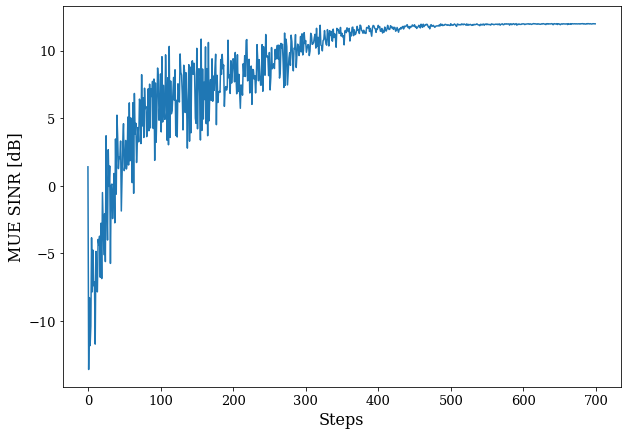

In [11]:
plt.figure(figsize=(10,7))
sns.lineplot(x=x, y=mue_sinrs.reshape(-1))
plt.xlabel('Steps', fontdict=x_font)
plt.ylabel('MUE SINR [dB]', fontdict=y_font)
plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
fig_name = 'mue-sinr'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
print(svg_path)
# save fig
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
plt.show()

## MUE Tx power

/home/lucas/dev/sys-simulator-2/figs/evaluate1/ddpg/mue-txpowers.svg


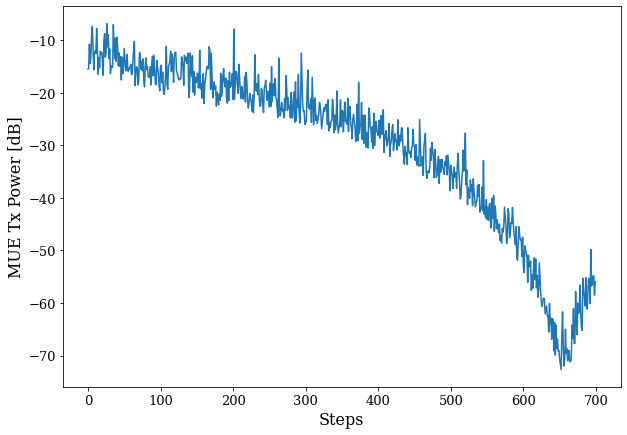

In [12]:
plt.figure(figsize=(10,7))
sns.lineplot(x=x, y=mue_tx_powers.reshape(-1))
plt.xlabel('Steps', fontdict=x_font)
plt.ylabel('MUE Tx Power [dB]', fontdict=y_font)
plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
fig_name = 'mue-txpowers'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
print(svg_path)
# save fig
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
plt.show()

## D2D SINR

/home/lucas/dev/sys-simulator-2/figs/evaluate1/ddpg/d2d-sinr.svg


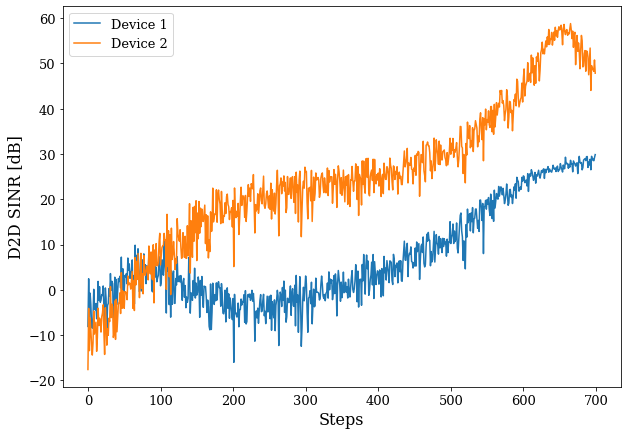

In [13]:
plt.figure(figsize=(10,7))
sns.lineplot(x=x, y=d2d_sinrs[:,0].reshape(-1), label='Device 1')
sns.lineplot(x=x, y=d2d_sinrs[:,1].reshape(-1), label='Device 2')
plt.xlabel('Steps', fontdict=x_font)
plt.ylabel('D2D SINR [dB]', fontdict=y_font)
plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.legend(prop=legends_font)
fig_name = 'd2d-sinr'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
print(svg_path)
# save fig
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
plt.show()

/home/lucas/dev/sys-simulator-2/figs/evaluate1/ddpg/d2d-sinr-device1.svg


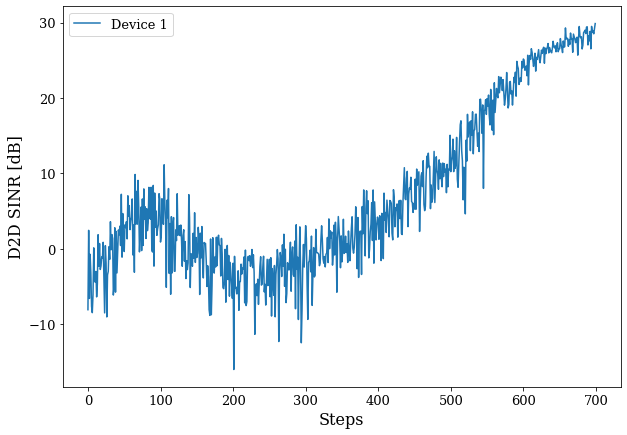

In [14]:
plt.figure(figsize=(10,7))
sns.lineplot(x=x, y=d2d_sinrs[:,0].reshape(-1), label='Device 1')
# sns.lineplot(x=x, y=d2d_sinrs[:,1].reshape(-1), label='Device 2')
plt.xlabel('Steps', fontdict=x_font)
plt.ylabel('D2D SINR [dB]', fontdict=y_font)
plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.legend(prop=legends_font)
fig_name = 'd2d-sinr-device1'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
print(svg_path)
# save fig
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
plt.show()

/home/lucas/dev/sys-simulator-2/figs/evaluate1/ddpg/d2d-sinr-device2.svg


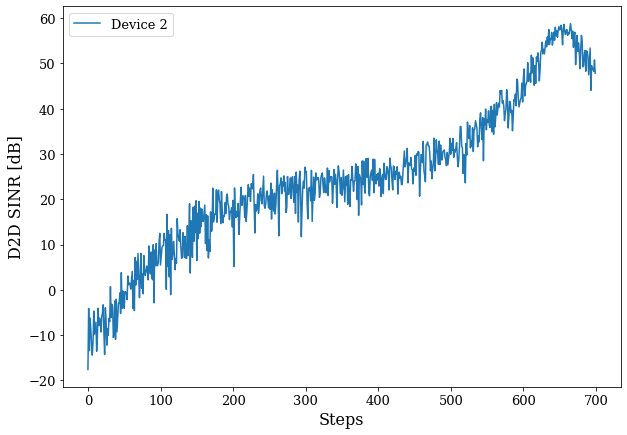

In [15]:
plt.figure(figsize=(10,7))
# sns.lineplot(x=x, y=d2d_sinrs[:,0].reshape(-1), label='Device 1')
sns.lineplot(x=x, y=d2d_sinrs[:,1].reshape(-1), label='Device 2')
plt.xlabel('Steps', fontdict=x_font)
plt.ylabel('D2D SINR [dB]', fontdict=y_font)
plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.legend(prop=legends_font)
fig_name = 'd2d-sinr-device2'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
print(svg_path)
# save fig
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
plt.show()

# D2D Tx Powers

In [139]:
plt.figure(figsize=(10,7))
sns.lineplot(x=x, y=d2d_tx_powers[:,0].reshape(-1), label='Device 1')
sns.lineplot(x=x, y=d2d_tx_powers[:,1].reshape(-1), label='Device 2')
plt.xlabel('Steps', fontdict=x_font)
plt.ylabel('D2D SINR [dB]', fontdict=y_font)
plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.legend(prop=legends_font)
fig_name = 'd2d-txpower'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
print(svg_path)
# save fig
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

/home/lucas/dev/sys-simulator-2/figs/evaluate1/dql/d2d-txpower.svg


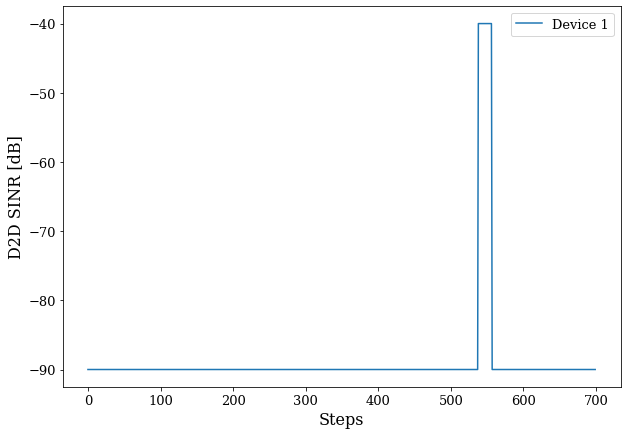

In [109]:
plt.figure(figsize=(10,7))
sns.lineplot(x=x, y=d2d_tx_powers[:,0].reshape(-1), label='Device 1')
# sns.lineplot(x=x, y=d2d_tx_powers[:,1].reshape(-1), label='Device 2')
plt.xlabel('Steps', fontdict=x_font)
plt.ylabel('D2D SINR [dB]', fontdict=y_font)
plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.legend(prop=legends_font)
fig_name = 'd2d-txpower'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
print(svg_path)
# save fig
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
plt.show()

/home/lucas/dev/sys-simulator-2/figs/evaluate1/dql/d2d-txpower.svg


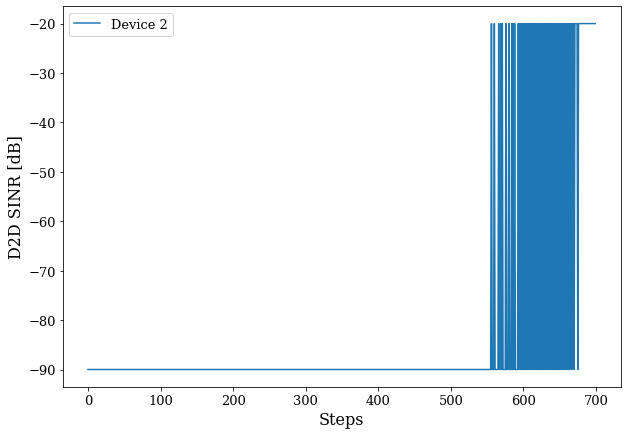

In [110]:
plt.figure(figsize=(10,7))
# sns.lineplot(x=x, y=d2d_tx_powers[:,0].reshape(-1), label='Device 1')
sns.lineplot(x=x, y=d2d_tx_powers[:,1].reshape(-1), label='Device 2')
plt.xlabel('Steps', fontdict=x_font)
plt.ylabel('D2D SINR [dB]', fontdict=y_font)
plt.xticks(**ticks_font)
plt.yticks(**ticks_font)
plt.legend(prop=legends_font)
fig_name = 'd2d-txpower'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
print(svg_path)
# save fig
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
plt.show()

## MUE availability

/home/lucas/dev/sys-simulator-2/figs/evaluate1/dql\mue-availability.svg


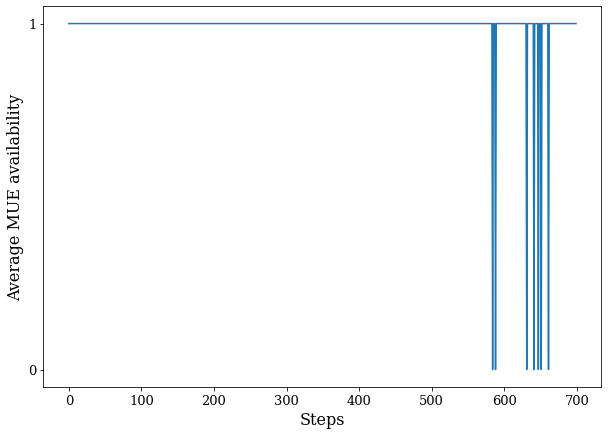

In [111]:
plt.figure(figsize=(10,7))
sns.lineplot(x=x, y=mue_availability.reshape(-1))
plt.xlabel('Steps', fontdict=x_font)
plt.ylabel('Average MUE availability', fontdict=y_font)
plt.xticks(**ticks_font)
plt.yticks([0., 1.], **ticks_font)
fig_name = 'mue-availability'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
print(svg_path)
# save fig
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
plt.show()

# Avg availability

In [112]:
np.mean(mue_availability)

0.99